## Digit Classification with the Kernel Perceptron
#### Prepared by: Ozlu Dolma - 942512

#### Relevant packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import polynomial_kernel
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

#### MNIST dataset is loaded and a random sample of size 30000 is drawn from the training set

In [2]:
mnist_train = pd.read_csv("C:/Users/Ozlu/Desktop/Dropbox/Dropbox Ozlu/mnist_train.csv")
mnist_test = pd.read_csv("C:/Users/Ozlu/Desktop/Dropbox/Dropbox Ozlu/mnist_test.csv")

In [3]:
mnist_train = mnist_train.sample(frac=0.5,random_state=41).reset_index().drop("index",1)

In [4]:
mnist_test = mnist_test.sample(frac=1,random_state=41).reset_index().drop("index",1)

#### Labels are separated from the data points

In [5]:
mnist_train_X = mnist_train.drop("label",1)

In [6]:
mnist_train_X= pd.DataFrame(mnist_train_X)

In [7]:
X_train=round((mnist_train_X).astype('float64'),2)

In [8]:
mnist_train_y = mnist_train["label"]

In [9]:
y_train=pd.DataFrame(mnist_train_y)

In [10]:
mnist_test_X = mnist_test.drop("label",1)

In [11]:
X_test=round((mnist_test_X).astype('float64'),2)

In [12]:
mnist_test_y = mnist_test["label"]

In [13]:
mnist_test_y=pd.DataFrame(mnist_test_y)

#### Definition of the function used for one-versus-all encoding of the label set

In [14]:
def o_v_a (labels):
    y_recode=[]
    for y in range(10):
        f = lambda x: -1 if x!=y else 1
        label = labels["label"].map(f)
        y_recode.append(label)
    return pd.DataFrame (y_recode).T

#### A dataframe of one-versus-all encoded label sets for each class is created

In [15]:
y_list=[]
for i in range (10):
    y_list.append((o_v_a(pd.DataFrame(y_train.iloc[:,0])).iloc[:,i]).to_numpy())

#### Computation of the polynomial kernel matrices used for training

In [16]:
K1=polynomial_kernel(X_train, Y=None, degree=1, gamma=1, coef0=1)

In [17]:
K2=polynomial_kernel(X_train, Y=None, degree=2, gamma=1, coef0=1)

In [18]:
K3=polynomial_kernel(X_train, Y=None, degree=3, gamma=1, coef0=1)

In [19]:
K4=polynomial_kernel(X_train, Y=None, degree=4, gamma=1, coef0=1)

In [20]:
K5=polynomial_kernel(X_train, Y=None, degree=5, gamma=1, coef0=1)

In [21]:
K6=polynomial_kernel(X_train, Y=None, degree=6, gamma=1, coef0=1)

#### Definition of the kernel perceptron function

In [23]:
def perceptron_krn(X, Y, e):
    w = np.zeros(len(X[0]))
    epochs = e
    l=[]

    for t in range(epochs):
        errors=0
        for i, x in enumerate(X):
            if (np.dot(X[i], w)*Y[i]) <= 0:
                w[i]= w[i]+ Y[i]
                errors=errors+1
    l.append([errors,w])
                
    return  l 

#### Definition of the function used for prediction

In [24]:
def predict (kernelmatrix,w_vector):
    y_hat=np.zeros(kernelmatrix.shape[0],)
    for n in range (0,kernelmatrix.shape[0]):
        s=[]
        for digit in range(10):
            b=(np.dot(kernelmatrix.iloc[n,:],w_vector[digit]))
            s.append(b)
        max_value=max(s)
        max_index=s.index(max_value)
        y_hat[n]=max_index
    return y_hat

#### Definition of the function used to determine the binary classifier achieving the smallest training error among those in the ensemble 

In [25]:
def ensemble_for_min_error (K,y,e):
    errors=[]
    p=[perceptron_krn (K, y, e) for e in range (1,11)]
    for i in range (e-1):
        errors.append(p[i][0][0])
    min_value = min(errors)
    min_index = errors.index(min_value)
    return p[min_index][0][1]

#### Definition of the function used to determine the binary classifier which is the average of the predictors in the ensemble

In [26]:
def ensemble_for_average (K,y,e):
    l=[]
    for i in range (1,e+1):
        l.append(perceptron_krn(K,y,i)[0][1])
    ll=pd.DataFrame(np.row_stack(l)).mean()
    return ll

#### Computation of the kernel matrix for polynomial degree 1 which was used for the prediction of the labels of the data points in the test set 

In [27]:
K_test_d1 = pd.DataFrame(polynomial_kernel(X_test, Y=X_train, degree=1, gamma=1, coef0=1))

#### Creation of the list of predictors achieving the smallest training error among those in the ensemble, for polynomial degree 1

In [28]:
ens_K1=[]
for epoch in range (2,11):
    l=[]
    for i in range (10):
        x=ensemble_for_min_error(K1, y_list[i],epoch)
        l.append(x)
    ens_K1.append(l)

#### Assessment of the multi-class classification performance on the training set based on accuracy scores for different number of epochs

In [29]:
acc_scr_K1_tr=[]
for i in range (9):
    acc_scr_K1_tr.append(accuracy_score(predict(pd.DataFrame(K1),ens_K1[i]),mnist_train_y))
acc_scr_K1_tr

[0.8329666666666666,
 0.8803666666666666,
 0.8771,
 0.8602,
 0.8767333333333334,
 0.8748,
 0.8836333333333334,
 0.8706333333333334,
 0.8737666666666667]

#### Assessment of the multi-class classification performance on the test set based on accuracy scores for different number of epochs

In [30]:
acc_scr_K1=[]
for i in range (9):
    acc_scr_K1.append(accuracy_score(predict(K_test_d1,ens_K1[i]),mnist_test_y))
acc_scr_K1

[0.8315, 0.8796, 0.8719, 0.856, 0.8696, 0.8652, 0.8728, 0.8621, 0.8636]

#### Creation of the list of predictors when the average of the predictors in the ensemble is used, for polynomial degree 1

In [31]:
ens_avr_K1=[]
for epoch in range (2,11):
    m=[]
    for i in range (10):
        z=ensemble_for_average(K1, y_list[i],epoch)
        m.append(z)
    ens_avr_K1.append(m)

#### Assessment of the multi-class classification performance on the training set based on accuracy scores for different number of epochs

In [32]:
acc_scr_K1_avr_tr=[]
for i in range (9):
    acc_scr_K1_avr_tr.append(accuracy_score(predict(pd.DataFrame(K1),ens_avr_K1[i]),mnist_train_y))
acc_scr_K1_avr_tr

[0.8688,
 0.8803333333333333,
 0.8842666666666666,
 0.8861333333333333,
 0.8875333333333333,
 0.8925666666666666,
 0.8914,
 0.8927666666666667,
 0.8932333333333333]

#### Assessment of the multi-class classification performance on the test set based on accuracy scores for different number of epochs

In [34]:
acc_scr_K1_avr=[]
for i in range (9):
    acc_scr_K1_avr.append(accuracy_score(predict(K_test_d1,ens_avr_K1[i]),mnist_test_y))
acc_scr_K1_avr

[0.865, 0.8755, 0.8775, 0.8793, 0.8802, 0.8849, 0.8851, 0.8859, 0.8849]

#### Computation of the kernel matrix for polynomial degree 2 which was used for the prediction of the labels of the data points in the test set

In [35]:
K_test_d2 = pd.DataFrame(polynomial_kernel(X_test, Y=X_train, degree=2, gamma=1, coef0=1))

#### Creation of the list of predictors achieving the smallest training error among those in the ensemble, for polynomial degree 2

In [37]:
ens_K2=[]
for epoch in range (2,11):
    l=[]
    for i in range (10):
        x=ensemble_for_min_error(K2, y_list[i],epoch)
        l.append(x)
    ens_K2.append(l)

#### Assessment of the multi-class classification performance on the training set based on accuracy scores for different number of epochs

In [38]:
acc_scr_K2_tr=[]
for i in range (9):
    acc_scr_K2_tr.append(accuracy_score(predict(pd.DataFrame(K2),ens_K2[i]),mnist_train_y))
acc_scr_K2_tr

[0.9675333333333334,
 0.9794666666666667,
 0.9871333333333333,
 0.9908333333333333,
 0.9915666666666667,
 0.9934333333333333,
 0.9960333333333333,
 0.9962666666666666,
 0.9979666666666667]

#### Assessment of the multi-class classification performance on the test set based on accuracy scores for different number of epochs

In [39]:
acc_scr_K2=[]
for i in range (9):
    acc_scr_K2.append(accuracy_score(predict(K_test_d2,ens_K2[i]),mnist_test_y))
acc_scr_K2

[0.9526, 0.956, 0.9637, 0.9683, 0.9652, 0.966, 0.9696, 0.9703, 0.9727]

#### Creation of the list of predictors when the average of the predictors in the ensemble is used, for polynomial degree 2

In [40]:
ens_avr_K2=[]
for epoch in range (2,11):
    m=[]
    for i in range (10):
        z=ensemble_for_average(K2, y_list[i],epoch)
        m.append(z)
    ens_avr_K2.append(m)

#### Assessment of the multi-class classification performance on the training set based on accuracy scores for different number of epochs

In [41]:
acc_scr_K2_avr_tr=[]
for i in range (9):
    acc_scr_K2_avr_tr.append(accuracy_score(predict(pd.DataFrame(K2),ens_avr_K2[i]),mnist_train_y))
acc_scr_K2_avr_tr

[0.9798666666666667,
 0.9859333333333333,
 0.9897,
 0.9919333333333333,
 0.9934666666666667,
 0.9949333333333333,
 0.9958333333333333,
 0.9964,
 0.9972]

#### Assessment of the multi-class classification performance on the test set based on accuracy scores for different number of epochs

In [42]:
acc_scr_K2_avr=[]
for i in range (9):
    acc_scr_K2_avr.append(accuracy_score(predict(K_test_d2,ens_avr_K2[i]),mnist_test_y))
acc_scr_K2_avr

[0.9599, 0.9637, 0.9678, 0.9679, 0.9692, 0.9709, 0.9714, 0.972, 0.9729]

#### Computation of the kernel matrix for polynomial degree 3 which was used for the prediction of the labels of the data points in the test set

In [43]:
K_test_d3 = pd.DataFrame(polynomial_kernel(X_test, Y=X_train, degree=3, gamma=1, coef0=1))

#### Creation of the list of predictors achieving the smallest training error among those in the ensemble, for polynomial degree 3

In [45]:
ens_K3=[]
for epoch in range (2,11):
    l=[]
    for i in range (10):
        x=ensemble_for_min_error(K3, y_list[i],epoch)
        l.append(x)
    ens_K3.append(l)

#### Assessment of the multi-class classification performance on the training set based on accuracy scores for different number of epochs

In [46]:
acc_scr_K3_tr=[]
for i in range (9):
    acc_scr_K3_tr.append(accuracy_score(predict(pd.DataFrame(K3),ens_K3[i]),mnist_train_y))
acc_scr_K3_tr

[0.9789333333333333,
 0.99,
 0.9966666666666667,
 0.997,
 0.9982,
 0.9988,
 0.9994333333333333,
 0.9996,
 0.9998666666666667]

#### Assessment of the multi-class classification performance on the test set based on accuracy scores for different number of epochs

In [47]:
acc_scr_K3=[]
for i in range (9):
    acc_scr_K3.append(accuracy_score(predict(K_test_d3,ens_K3[i]),mnist_test_y))
acc_scr_K3

[0.9597, 0.9663, 0.9741, 0.9724, 0.9756, 0.9771, 0.9771, 0.9781, 0.978]

#### Creation of the list of predictors when the average of the predictors in the ensemble is used, for polynomial degree 3

In [48]:
ens_avr_K3=[]
for epoch in range (2,11):
    m=[]
    for i in range (10):
        z=ensemble_for_average(K3, y_list[i],epoch)
        m.append(z)
    ens_avr_K3.append(m)

#### Assessment of the multi-class classification performance on the training set based on accuracy scores for different number of epochs

In [49]:
acc_scr_K3_avr_tr=[]
for i in range (9):
    acc_scr_K3_avr_tr.append(accuracy_score(predict(pd.DataFrame(K3),ens_avr_K3[i]),mnist_train_y))
acc_scr_K3_avr_tr

[0.9907,
 0.9955666666666667,
 0.9973666666666666,
 0.9982333333333333,
 0.999,
 0.9992666666666666,
 0.9995,
 0.9996333333333334,
 0.9997333333333334]

#### Assessment of the multi-class classification performance on the test set based on accuracy scores for different number of epochs

In [50]:
acc_scr_K3_avr=[]
for i in range (9):
    acc_scr_K3_avr.append(accuracy_score(predict(K_test_d3,ens_avr_K3[i]),mnist_test_y))
acc_scr_K3_avr

[0.9692, 0.9732, 0.9748, 0.9757, 0.9763, 0.977, 0.9779, 0.978, 0.9789]

#### Computation of the kernel matrix for polynomial degree 4 which was used for the prediction of the labels of the data points in the test set

In [51]:
K_test_d4 = pd.DataFrame(polynomial_kernel(X_test, Y=X_train, degree=4, gamma=1, coef0=1))

#### Creation of the list of predictors achieving the smallest training error among those in the ensemble, for polynomial degree 4

In [52]:
ens_K4=[]
for epoch in range (2,11):
    l=[]
    for i in range (10):
        x=ensemble_for_min_error(K4, y_list[i],epoch)
        l.append(x)
    ens_K4.append(l)

#### Assessment of the multi-class classification performance on the training set based on accuracy scores for different number of epochs

In [53]:
acc_scr_K4_tr=[]
for i in range (9):
    acc_scr_K4_tr.append(accuracy_score(predict(pd.DataFrame(K4),ens_K4[i]),mnist_train_y))
acc_scr_K4_tr

[0.9845333333333334,
 0.9949666666666667,
 0.9983333333333333,
 0.9992,
 0.9989666666666667,
 0.9997,
 0.9998,
 1.0,
 1.0]

#### Assessment of the multi-class classification performance on the test set based on accuracy scores for different number of epochs

In [54]:
acc_scr_K4=[]
for i in range (9):
    acc_scr_K4.append(accuracy_score(predict(K_test_d4,ens_K4[i]),mnist_test_y))
acc_scr_K4

[0.9679, 0.9722, 0.9763, 0.979, 0.9787, 0.9763, 0.9789, 0.979, 0.9793]

#### Creation of the list of predictors when the average of the predictors in the ensemble is used, for polynomial degree 4

In [56]:
ens_avr_K4=[]
for epoch in range (2,11):
    m=[]
    for i in range (10):
        z=ensemble_for_average(K4, y_list[i],epoch)
        m.append(z)
    ens_avr_K4.append(m)

#### Assessment of the multi-class classification performance on the training set based on accuracy scores for different number of epochs

In [57]:
acc_scr_K4_avr_tr=[]
for i in range (9):
    acc_scr_K4_avr_tr.append(accuracy_score(predict(pd.DataFrame(K4),ens_avr_K4[i]),mnist_train_y))
acc_scr_K4_avr_tr

[0.9947,
 0.9978,
 0.9988,
 0.9993666666666666,
 0.9996333333333334,
 0.9997333333333334,
 0.9998333333333334,
 0.9999,
 0.9999666666666667]

#### Assessment of the multi-class classification performance on the test set based on accuracy scores for different number of epochs

In [58]:
acc_scr_K4_avr=[]
for i in range (9):
    acc_scr_K4_avr.append(accuracy_score(predict(K_test_d4,ens_avr_K4[i]),mnist_test_y))
acc_scr_K4_avr

[0.9753, 0.9781, 0.9793, 0.9795, 0.9797, 0.9793, 0.9788, 0.9788, 0.9792]

#### Computation of the kernel matrix for polynomial degree 5 which was used for the prediction of the labels of the data points in the test set

In [59]:
K_test_d5 = pd.DataFrame(polynomial_kernel(X_test, Y=X_train, degree=5, gamma=1, coef0=1))

#### Creation of the list of predictors achieving the smallest training error among those in the ensemble, for polynomial degree 5

In [60]:
ens_K5=[]
for epoch in range (2,11):
    l=[]
    for i in range (10):
        x=ensemble_for_min_error(K5, y_list[i],epoch)
        l.append(x)
    ens_K5.append(l)

#### Assessment of the multi-class classification performance on the training set based on accuracy scores for different number of epochs

In [61]:
acc_scr_K5_tr=[]
for i in range (9):
    acc_scr_K5_tr.append(accuracy_score(predict(pd.DataFrame(K5),ens_K5[i]),mnist_train_y))
acc_scr_K5_tr

[0.9832666666666666,
 0.9957333333333334,
 0.9988333333333334,
 0.9990666666666667,
 0.9999,
 0.9998666666666667,
 0.9998666666666667,
 1.0,
 1.0]

#### Assessment of the multi-class classification performance on the test set based on accuracy scores for different number of epochs

In [62]:
acc_scr_K5=[]
for i in range (9):
    acc_scr_K5.append(accuracy_score(predict(K_test_d5,ens_K5[i]),mnist_test_y))
acc_scr_K5

[0.9651, 0.9736, 0.9741, 0.975, 0.9774, 0.9768, 0.977, 0.9772, 0.9772]

#### Creation of the list of predictors when the average of the predictors in the ensemble is used, for polynomial degree 5

In [63]:
ens_avr_K5=[]
for epoch in range (2,11):
    m=[]
    for i in range (10):
        z=ensemble_for_average(K5, y_list[i],epoch)
        m.append(z)
    ens_avr_K5.append(m)

#### Assessment of the multi-class classification performance on the training set based on accuracy scores for different number of epochs

In [64]:
acc_scr_K5_avr_tr=[]
for i in range (9):
    acc_scr_K5_avr_tr.append(accuracy_score(predict(pd.DataFrame(K5),ens_avr_K5[i]),mnist_train_y))
acc_scr_K5_avr_tr

[0.9947,
 0.9981,
 0.9988333333333334,
 0.9992666666666666,
 0.9995,
 0.9995666666666667,
 0.9997,
 0.9997666666666667,
 0.9998333333333334]

#### Assessment of the multi-class classification performance on the test set based on accuracy scores for different number of epochs

In [65]:
acc_scr_K5_avr=[]
for i in range (9):
    acc_scr_K5_avr.append(accuracy_score(predict(K_test_d5,ens_avr_K5[i]),mnist_test_y))
acc_scr_K5_avr

[0.9726, 0.9753, 0.9756, 0.9758, 0.9765, 0.9768, 0.9769, 0.9767, 0.9767]

#### Computation of the kernel matrix for polynomial degree 6 which was used for the prediction of the labels of the data points in the test set

In [74]:
K_test_d6 = pd.DataFrame(polynomial_kernel(X_test, Y=X_train, degree=6, gamma=1, coef0=1))

#### Creation of the list of predictors achieving the smallest training error among those in the ensemble, for polynomial degree 6

In [76]:
ens_K6=[]
for epoch in range (2,11):
    l=[]
    for i in range (10):
        x=ensemble_for_min_error(K6, y_list[i],epoch)
        l.append(x)
    ens_K6.append(l)

#### Assessment of the multi-class classification performance on the training set based on accuracy scores for different number of epochs

In [77]:
acc_scr_K6_tr=[]
for i in range (9):
    acc_scr_K6_tr.append(accuracy_score(predict(pd.DataFrame(K6),ens_K6[i]),mnist_train_y))
acc_scr_K6_tr

[0.9834,
 0.9947,
 0.9979333333333333,
 0.9993666666666666,
 0.9996333333333334,
 0.9995333333333334,
 0.9995666666666667,
 0.9996,
 0.9998]

#### Assessment of the multi-class classification performance on the test set based on accuracy scores for different number of epochs

In [78]:
acc_scr_K6=[]
for i in range (9):
    acc_scr_K6.append(accuracy_score(predict(K_test_d6,ens_K6[i]),mnist_test_y))
acc_scr_K6

[0.9622, 0.9732, 0.9732, 0.974, 0.9748, 0.9743, 0.9741, 0.9746, 0.9752]

#### Creation of the list of predictors when the average of the predictors in the ensemble is used, for polynomial degree 6

In [79]:
ens_avr_K6=[]
for epoch in range (2,11):
    m=[]
    for i in range (10):
        z=ensemble_for_average(K6, y_list[i],epoch)
        m.append(z)
    ens_avr_K6.append(m)

#### Assessment of the multi-class classification performance on the training set based on accuracy scores for different number of epochs

In [80]:
acc_scr_K6_avr_tr=[]
for i in range (9):
    acc_scr_K6_avr_tr.append(accuracy_score(predict(pd.DataFrame(K6),ens_avr_K6[i]),mnist_train_y))
acc_scr_K6_avr_tr

[0.9946666666666667,
 0.9973666666666666,
 0.9985666666666667,
 0.999,
 0.9992,
 0.9993333333333333,
 0.9995,
 0.9995,
 0.9995333333333334]

#### Assessment of the multi-class classification performance on the test set based on accuracy scores for different number of epochs

In [81]:
acc_scr_K6_avr=[]
for i in range (9):
    acc_scr_K6_avr.append(accuracy_score(predict(K_test_d6,ens_avr_K6[i]),mnist_test_y))
acc_scr_K6_avr

[0.9718, 0.9743, 0.9756, 0.9755, 0.9757, 0.9752, 0.9752, 0.9753, 0.9752]

#### Collection of lists of accuracy scores used for plotting them across different number of epochs in order to make comparisons for different degrees of the polynomial and the two methods used for predictor selection

In [82]:
acc_scrs=[]
for i in range (9):
    acc_scrs.append(acc_scr_K1[i])
    acc_scrs.append(acc_scr_K2[i])
    acc_scrs.append(acc_scr_K3[i])
    acc_scrs.append(acc_scr_K4[i])
    acc_scrs.append(acc_scr_K5[i])
    acc_scrs.append(acc_scr_K6[i])

In [83]:
acc_scrs_avr=[]
for i in range (9):
    acc_scrs_avr.append(acc_scr_K1_avr[i])
    acc_scrs_avr.append(acc_scr_K2_avr[i])
    acc_scrs_avr.append(acc_scr_K3_avr[i])
    acc_scrs_avr.append(acc_scr_K4_avr[i])
    acc_scrs_avr.append(acc_scr_K5_avr[i])
    acc_scrs_avr.append(acc_scr_K6_avr[i])

In [84]:
acc_scrs_tr=[]
for i in range (9):
    acc_scrs_tr.append(acc_scr_K1_tr[i])
    acc_scrs_tr.append(acc_scr_K2_tr[i])
    acc_scrs_tr.append(acc_scr_K3_tr[i])
    acc_scrs_tr.append(acc_scr_K4_tr[i])
    acc_scrs_tr.append(acc_scr_K5_tr[i])
    acc_scrs_tr.append(acc_scr_K6_tr[i])

In [85]:
acc_scrs_avr_tr=[]
for i in range (9):
    acc_scrs_avr_tr.append(acc_scr_K1_avr_tr[i])
    acc_scrs_avr_tr.append(acc_scr_K2_avr_tr[i])
    acc_scrs_avr_tr.append(acc_scr_K3_avr_tr[i])
    acc_scrs_avr_tr.append(acc_scr_K4_avr_tr[i])
    acc_scrs_avr_tr.append(acc_scr_K5_avr_tr[i])
    acc_scrs_avr_tr.append(acc_scr_K6_avr_tr[i])

### Plots for the two different methods used (Minimum Training Error and Average)

In [86]:
x1=[2,3,4,5,6,7,8,9,10]
e_list=np.repeat(x1,6)

In [87]:
d_list=[1,2,3,4,5,6]
n=9
d_list=d_list*9

In [88]:
data1 = [e_list,d_list,acc_scrs]
df1 = pd.DataFrame(data1)
df1 = df1.T
df1.columns =['# of epochs', 'degree', 'accuracy']

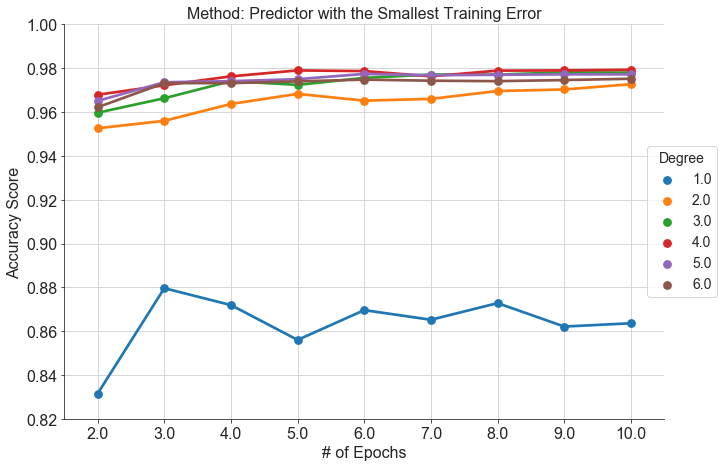

In [89]:
sns.set_style("ticks")
g = sns.catplot(x="# of epochs", y="accuracy", hue="degree", kind="point", data=df1, height=6, aspect=1.5, legend=False)
plt.legend(title='Degree',title_fontsize=14, fontsize=14, loc='right', bbox_to_anchor=(1.1,0.5))
plt.xlabel('# of Epochs',fontsize=16)
plt.ylabel('Accuracy Score',fontsize=16)
plt.title('Method: Predictor with the Smallest Training Error',fontsize=16)
g.set_xticklabels(fontsize=16)
g.set_yticklabels(fontsize=16)
for ax in g.axes.flat:
    ax.grid(True, axis='both')

In [90]:
data2 = [e_list,d_list,acc_scrs_avr]
df2 = pd.DataFrame(data2)
df2 = df2.T
df2.columns =['# of epochs', 'degree', 'accuracy']

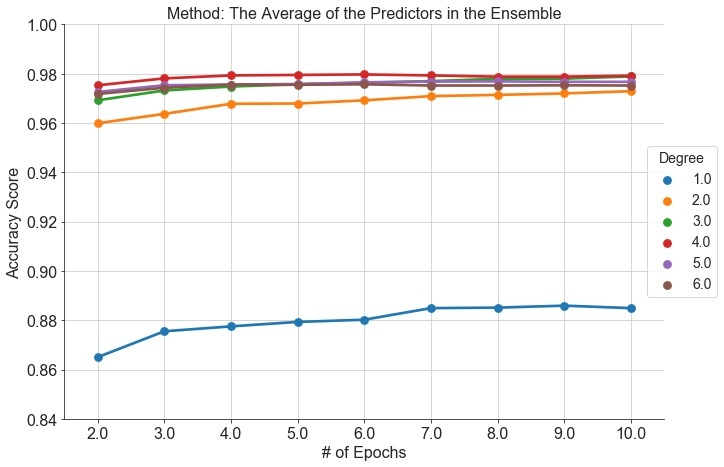

In [91]:
sns.set_style("ticks")
g = sns.catplot(x="# of epochs", y="accuracy", hue="degree", kind="point", data=df2, height=6, aspect=1.5, legend=False)
plt.legend(title='Degree',title_fontsize=14, fontsize=14, loc='right', bbox_to_anchor=(1.1,0.5))
plt.xlabel('# of Epochs',fontsize=16)
plt.ylabel('Accuracy Score',fontsize=16)
plt.title('Method: The Average of the Predictors in the Ensemble',fontsize=16)
g.set_xticklabels(fontsize=16)
g.set_yticklabels(fontsize=16)
for ax in g.axes.flat:
    ax.grid(True, axis='both')

### Plots for each degree of polynomial to compare the accuracy scores for training and testing, when the predictor achieving the smallest training error among those in the ensemble is used

In [92]:
tr=list(itertools.repeat('training',9))
ts=list(itertools.repeat('test',9))

In [93]:
tr.extend(ts)

In [94]:
data3 = [e_list,d_list,acc_scrs_tr]
df3 = pd.DataFrame(data3)
df3 = df3.T
df3.columns =['# of epochs', 'degree', 'accuracy']

In [95]:
data4 = [e_list,d_list,acc_scrs_avr_tr]
df4 = pd.DataFrame(data4)
df4 = df4.T
df4.columns =['# of epochs', 'degree', 'accuracy']

In [96]:
d1_tr=df3.loc[df3['degree'] == 1].append(df1.loc[df1['degree'] == 1])
d1_tr['tr/ts']=tr

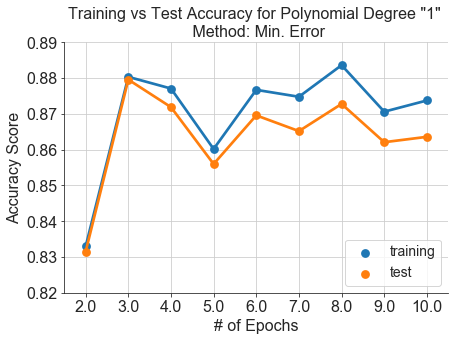

In [97]:
sns.set_style("ticks")
g = sns.catplot(x="# of epochs", y="accuracy", hue="tr/ts", kind="point", data=d1_tr, height=4, aspect=1.5, legend=False)
plt.legend(fontsize=14, loc='lower right')
plt.xlabel('# of Epochs',fontsize=16)
plt.ylabel('Accuracy Score',fontsize=16)
plt.title('Training vs Test Accuracy for Polynomial Degree "1" \n Method: Min. Error',fontsize=16)
g.set_xticklabels(fontsize=16)
g.set_yticklabels(fontsize=16)
for ax in g.axes.flat:
    ax.grid(True, axis='both')

In [98]:
d2_tr=df3.loc[df3['degree'] == 2].append(df1.loc[df1['degree'] == 2])
d2_tr['tr/ts']=tr

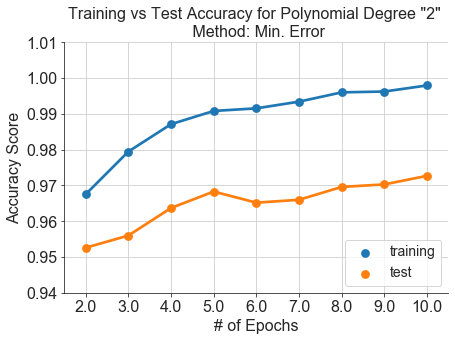

In [99]:
sns.set_style("ticks")
g = sns.catplot(x="# of epochs", y="accuracy", hue="tr/ts", kind="point", data=d2_tr, height=4, aspect=1.5, legend=False)
plt.legend(fontsize=14, loc='lower right')
plt.xlabel('# of Epochs',fontsize=16)
plt.ylabel('Accuracy Score',fontsize=16)
plt.title('Training vs Test Accuracy for Polynomial Degree "2" \n Method: Min. Error',fontsize=16)
g.set_xticklabels(fontsize=16)
g.set_yticklabels(fontsize=16)
for ax in g.axes.flat:
    ax.grid(True, axis='both')

In [100]:
d3_tr=df3.loc[df3['degree'] == 3].append(df1.loc[df1['degree'] == 3])
d3_tr['tr/ts']=tr

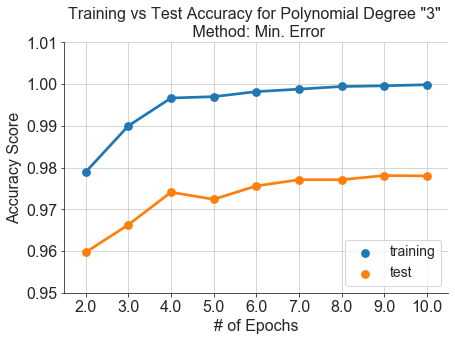

In [101]:
sns.set_style("ticks")
g = sns.catplot(x="# of epochs", y="accuracy", hue="tr/ts", kind="point", data=d3_tr, height=4, aspect=1.5, legend=False)
plt.legend(fontsize=14, loc='lower right')
plt.xlabel('# of Epochs',fontsize=16)
plt.ylabel('Accuracy Score',fontsize=16)
plt.title('Training vs Test Accuracy for Polynomial Degree "3" \n Method: Min. Error',fontsize=16)
g.set_xticklabels(fontsize=16)
g.set_yticklabels(fontsize=16)
for ax in g.axes.flat:
    ax.grid(True, axis='both')

In [102]:
d4_tr=df3.loc[df3['degree'] == 4].append(df1.loc[df1['degree'] == 4])
d4_tr['tr/ts']=tr

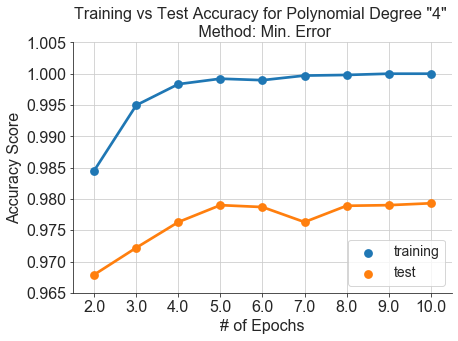

In [103]:
sns.set_style("ticks")
g = sns.catplot(x="# of epochs", y="accuracy", hue="tr/ts", kind="point", data=d4_tr, height=4, aspect=1.5, legend=False)
plt.legend(fontsize=14, loc='lower right')
plt.xlabel('# of Epochs',fontsize=16)
plt.ylabel('Accuracy Score',fontsize=16)
plt.title('Training vs Test Accuracy for Polynomial Degree "4" \n Method: Min. Error',fontsize=16)
g.set_xticklabels(fontsize=16)
g.set_yticklabels(fontsize=16)
for ax in g.axes.flat:
    ax.grid(True, axis='both')

In [104]:
d5_tr=df3.loc[df3['degree'] == 5].append(df1.loc[df1['degree'] == 5])
d5_tr['tr/ts']=tr

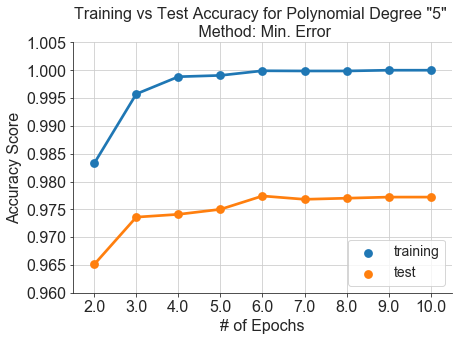

In [105]:
sns.set_style("ticks")
g = sns.catplot(x="# of epochs", y="accuracy", hue="tr/ts", kind="point", data=d5_tr, height=4, aspect=1.5, legend=False)
plt.legend(fontsize=14, loc='lower right')
plt.xlabel('# of Epochs',fontsize=16)
plt.ylabel('Accuracy Score',fontsize=16)
plt.title('Training vs Test Accuracy for Polynomial Degree "5" \n Method: Min. Error',fontsize=16)
g.set_xticklabels(fontsize=16)
g.set_yticklabels(fontsize=16)
for ax in g.axes.flat:
    ax.grid(True, axis='both')

In [106]:
d6_tr=df3.loc[df3['degree'] == 6].append(df1.loc[df1['degree'] == 6])
d6_tr['tr/ts']=tr

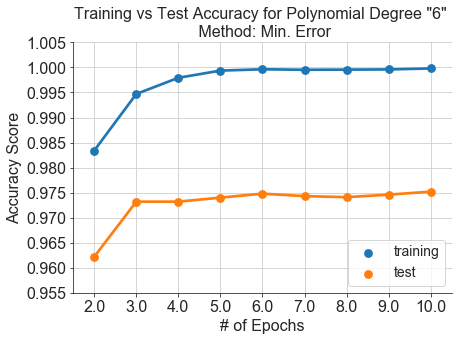

In [107]:
sns.set_style("ticks")
g = sns.catplot(x="# of epochs", y="accuracy", hue="tr/ts", kind="point", data=d6_tr, height=4, aspect=1.5, legend=False)
plt.legend(fontsize=14, loc='lower right')
plt.xlabel('# of Epochs',fontsize=16)
plt.ylabel('Accuracy Score',fontsize=16)
plt.title('Training vs Test Accuracy for Polynomial Degree "6" \n Method: Min. Error',fontsize=16)
g.set_xticklabels(fontsize=16)
g.set_yticklabels(fontsize=16)
for ax in g.axes.flat:
    ax.grid(True, axis='both')

### Plots for each degree of the polynomial in order to compare the accuracy scores for training and testing, when the average of the predictors in the ensemble is used

In [108]:
d1_avr_tr=df4.loc[df4['degree'] == 1].append(df2.loc[df2['degree'] == 1])
d1_avr_tr['tr/ts']=tr

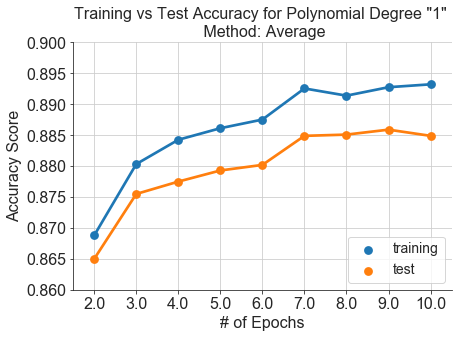

In [109]:
sns.set_style("ticks")
g = sns.catplot(x="# of epochs", y="accuracy", hue="tr/ts", kind="point", data=d1_avr_tr, height=4, aspect=1.5, legend=False)
plt.legend(fontsize=14, loc='lower right')
plt.xlabel('# of Epochs',fontsize=16)
plt.ylabel('Accuracy Score',fontsize=16)
plt.title('Training vs Test Accuracy for Polynomial Degree "1" \n Method: Average',fontsize=16)
g.set_xticklabels(fontsize=16)
g.set_yticklabels(fontsize=16)
for ax in g.axes.flat:
    ax.grid(True, axis='both')

In [110]:
d2_avr_tr=df4.loc[df4['degree'] == 2].append(df2.loc[df2['degree'] == 2])
d2_avr_tr['tr/ts']=tr

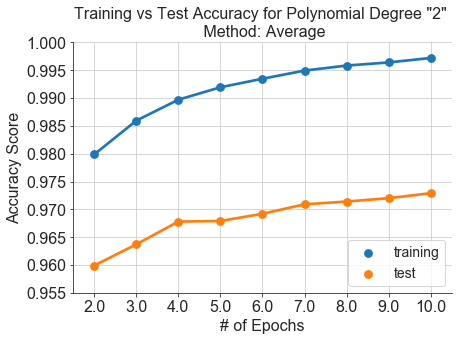

In [111]:
sns.set_style("ticks")
g = sns.catplot(x="# of epochs", y="accuracy", hue="tr/ts", kind="point", data=d2_avr_tr, height=4, aspect=1.5, legend=False)
plt.legend(fontsize=14, loc='lower right')
plt.xlabel('# of Epochs',fontsize=16)
plt.ylabel('Accuracy Score',fontsize=16)
plt.title('Training vs Test Accuracy for Polynomial Degree "2" \n Method: Average',fontsize=16)
g.set_xticklabels(fontsize=16)
g.set_yticklabels(fontsize=16)
for ax in g.axes.flat:
    ax.grid(True, axis='both')

In [112]:
d3_avr_tr=df4.loc[df4['degree'] == 3].append(df2.loc[df2['degree'] == 3])
d3_avr_tr['tr/ts']=tr

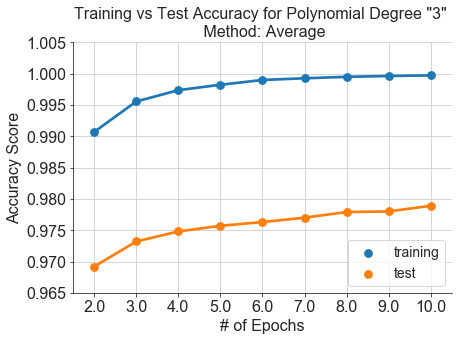

In [113]:
sns.set_style("ticks")
g = sns.catplot(x="# of epochs", y="accuracy", hue="tr/ts", kind="point", data=d3_avr_tr, height=4, aspect=1.5, legend=False)
plt.legend(fontsize=14, loc='lower right')
plt.xlabel('# of Epochs',fontsize=16)
plt.ylabel('Accuracy Score',fontsize=16)
plt.title('Training vs Test Accuracy for Polynomial Degree "3" \n Method: Average',fontsize=16)
g.set_xticklabels(fontsize=16)
g.set_yticklabels(fontsize=16)
for ax in g.axes.flat:
    ax.grid(True, axis='both')

In [114]:
d4_avr_tr=df4.loc[df4['degree'] == 4].append(df2.loc[df2['degree'] == 4])
d4_avr_tr['tr/ts']=tr

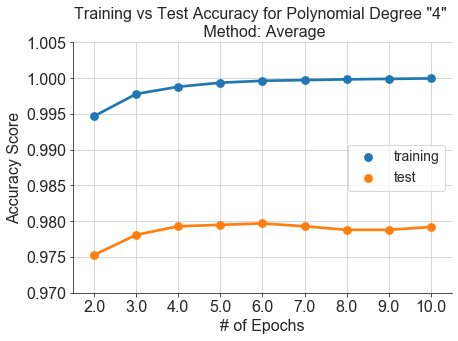

In [115]:
sns.set_style("ticks")
g = sns.catplot(x="# of epochs", y="accuracy", hue="tr/ts", kind="point", data=d4_avr_tr, height=4, aspect=1.5, legend=False)
plt.legend(fontsize=14, loc='center right')
plt.xlabel('# of Epochs',fontsize=16)
plt.ylabel('Accuracy Score',fontsize=16)
plt.title('Training vs Test Accuracy for Polynomial Degree "4" \n Method: Average',fontsize=16)
g.set_xticklabels(fontsize=16)
g.set_yticklabels(fontsize=16)
for ax in g.axes.flat:
    ax.grid(True, axis='both')

In [116]:
d5_avr_tr=df4.loc[df4['degree'] == 5].append(df2.loc[df2['degree'] == 5])
d5_avr_tr['tr/ts']=tr

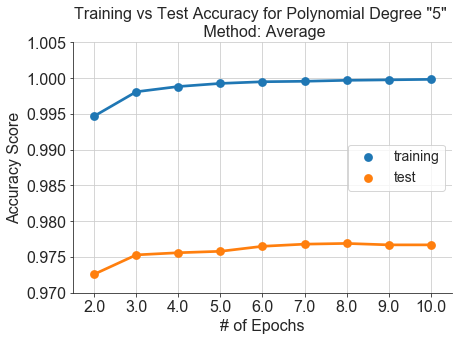

In [117]:
sns.set_style("ticks")
g = sns.catplot(x="# of epochs", y="accuracy", hue="tr/ts", kind="point", data=d5_avr_tr, height=4, aspect=1.5, legend=False)
plt.legend(fontsize=14, loc='center right')
plt.xlabel('# of Epochs',fontsize=16)
plt.ylabel('Accuracy Score',fontsize=16)
plt.title('Training vs Test Accuracy for Polynomial Degree "5" \n Method: Average',fontsize=16)
g.set_xticklabels(fontsize=16)
g.set_yticklabels(fontsize=16)
for ax in g.axes.flat:
    ax.grid(True, axis='both')

In [118]:
d6_avr_tr=df4.loc[df4['degree'] == 6].append(df2.loc[df2['degree'] == 6])
d6_avr_tr['tr/ts']=tr

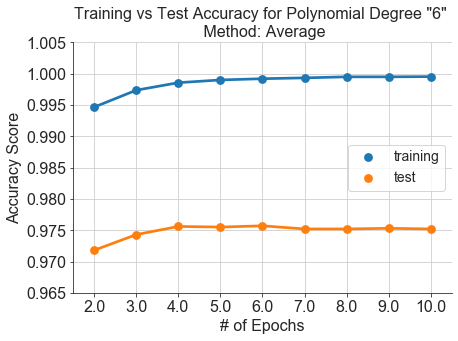

In [119]:
sns.set_style("ticks")
g = sns.catplot(x="# of epochs", y="accuracy", hue="tr/ts", kind="point", data=d6_avr_tr, height=4, aspect=1.5, legend=False)
plt.legend(fontsize=14, loc='center right')
plt.xlabel('# of Epochs',fontsize=16)
plt.ylabel('Accuracy Score',fontsize=16)
plt.title('Training vs Test Accuracy for Polynomial Degree "6" \n Method: Average',fontsize=16)
g.set_xticklabels(fontsize=16)
g.set_yticklabels(fontsize=16)
for ax in g.axes.flat:
    ax.grid(True, axis='both')

### Plots for each degree of the polynomial in order to compare the multi-class classification performance achieved when two different methods are used for predictor selection

In [120]:
method1=list(itertools.repeat('min_error',9))
method2=list(itertools.repeat('average',9))

In [121]:
method1.extend(method2)

In [122]:
d1=df1.loc[df1['degree'] == 1].append(df2.loc[df2['degree'] == 1])

In [123]:
d1['method']=method1

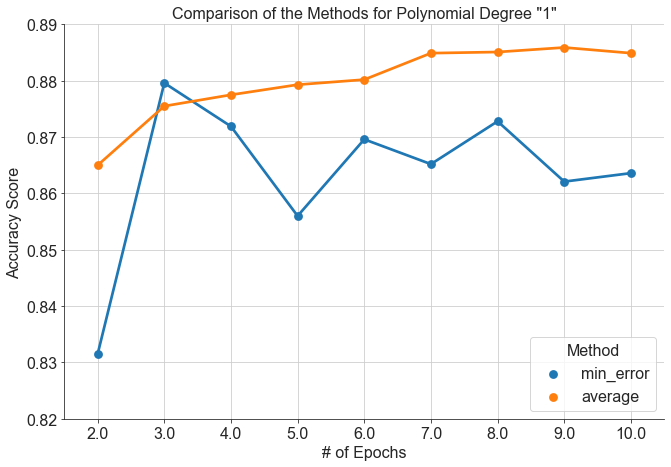

In [124]:
sns.set_style("ticks")
g = sns.catplot(x="# of epochs", y="accuracy", hue="method", kind="point", data=d1, height=6, aspect=1.5, legend=False)
plt.legend(title='Method',title_fontsize=16, fontsize=16, loc='lower right')
plt.xlabel('# of Epochs',fontsize=16)
plt.ylabel('Accuracy Score',fontsize=16)
plt.title('Comparison of the Methods for Polynomial Degree "1"',fontsize=16)
g.set_xticklabels(fontsize=16)
g.set_yticklabels(fontsize=16)
for ax in g.axes.flat:
    ax.grid(True, axis='both')

In [125]:
d2=df1.loc[df1['degree'] == 2].append(df2.loc[df2['degree'] == 2])
d2['method']=method1

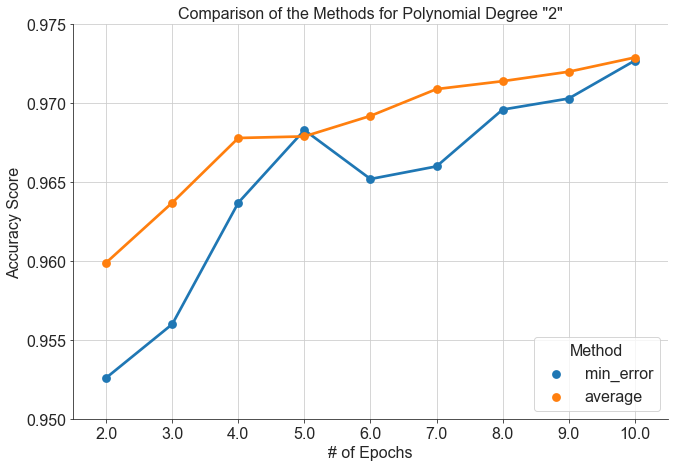

In [126]:
sns.set_style("ticks")
g = sns.catplot(x="# of epochs", y="accuracy", hue="method", kind="point", data=d2, height=6, aspect=1.5, legend=False)
plt.legend(title='Method',title_fontsize=16, fontsize=16, loc='lower right')
plt.xlabel('# of Epochs',fontsize=16)
plt.ylabel('Accuracy Score',fontsize=16)
plt.title('Comparison of the Methods for Polynomial Degree "2"',fontsize=16)
g.set_xticklabels(fontsize=16)
g.set_yticklabels(fontsize=16)
for ax in g.axes.flat:
    ax.grid(True, axis='both')

In [127]:
d3=df1.loc[df1['degree'] == 3].append(df2.loc[df2['degree'] == 3])
d3['method']=method1

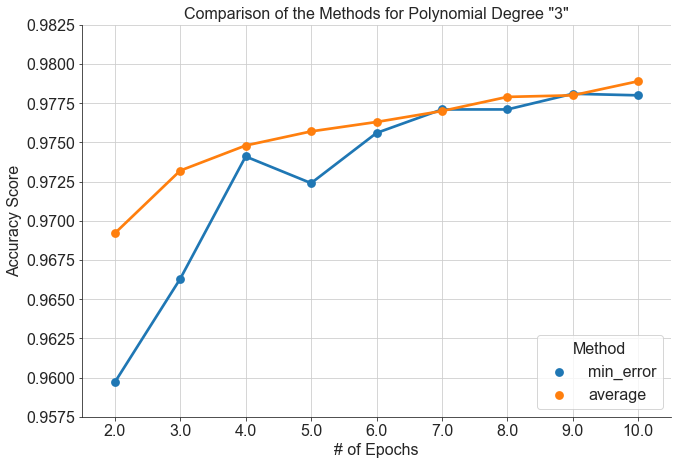

In [128]:
sns.set_style("ticks")
g = sns.catplot(x="# of epochs", y="accuracy", hue="method", kind="point", data=d3, height=6, aspect=1.5, legend=False)
plt.legend(title='Method',title_fontsize=16, fontsize=16, loc='lower right')
plt.xlabel('# of Epochs',fontsize=16)
plt.ylabel('Accuracy Score',fontsize=16)
plt.title('Comparison of the Methods for Polynomial Degree "3"',fontsize=16)
g.set_xticklabels(fontsize=16)
g.set_yticklabels(fontsize=16)
for ax in g.axes.flat:
    ax.grid(True, axis='both')

In [129]:
d4=df1.loc[df1['degree'] == 4].append(df2.loc[df2['degree'] == 4])
d4['method']=method1

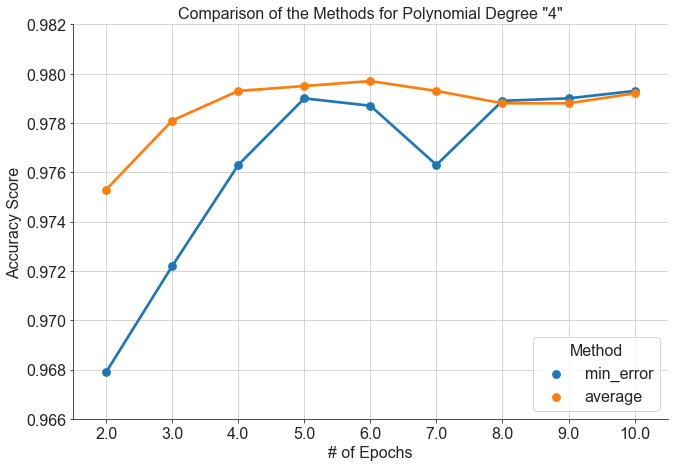

In [130]:
sns.set_style("ticks")
g = sns.catplot(x="# of epochs", y="accuracy", hue="method", kind="point", data=d4, height=6, aspect=1.5, legend=False)
plt.legend(title='Method',title_fontsize=16, fontsize=16, loc='lower right')
plt.xlabel('# of Epochs',fontsize=16)
plt.ylabel('Accuracy Score',fontsize=16)
plt.title('Comparison of the Methods for Polynomial Degree "4"',fontsize=16)
g.set_xticklabels(fontsize=16)
g.set_yticklabels(fontsize=16)
for ax in g.axes.flat:
    ax.grid(True, axis='both')

In [131]:
d5=df1.loc[df1['degree'] == 5].append(df2.loc[df2['degree'] == 5])
d5['method']=method1

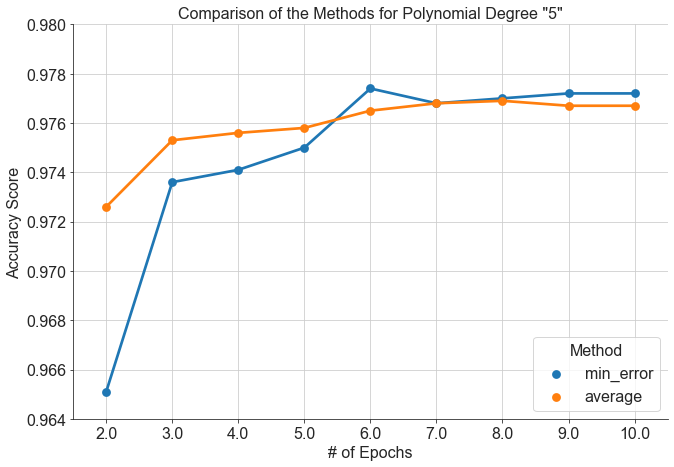

In [132]:
sns.set_style("ticks")
g = sns.catplot(x="# of epochs", y="accuracy", hue="method", kind="point", data=d5, height=6, aspect=1.5, legend=False)
plt.legend(title='Method',title_fontsize=16, fontsize=16, loc='lower right')
plt.xlabel('# of Epochs',fontsize=16)
plt.ylabel('Accuracy Score',fontsize=16)
plt.title('Comparison of the Methods for Polynomial Degree "5"',fontsize=16)
g.set_xticklabels(fontsize=16)
g.set_yticklabels(fontsize=16)
for ax in g.axes.flat:
    ax.grid(True, axis='both')

In [133]:
d6=df1.loc[df1['degree'] == 6].append(df2.loc[df2['degree'] == 6])
d6['method']=method1

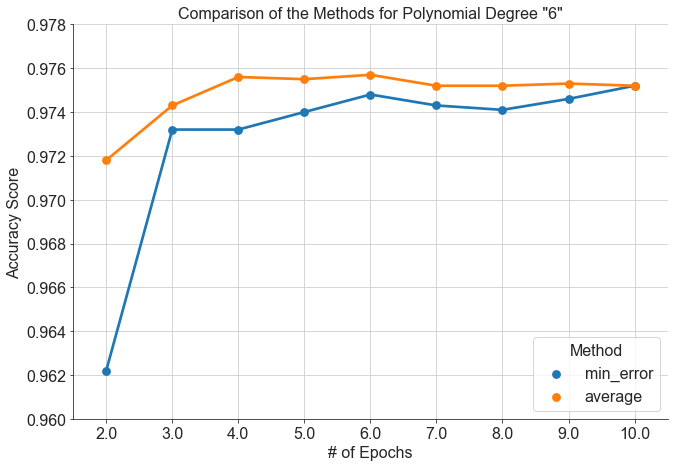

In [134]:
sns.set_style("ticks")
g = sns.catplot(x="# of epochs", y="accuracy", hue="method", kind="point", data=d6, height=6, aspect=1.5, legend=False)
plt.legend(title='Method',title_fontsize=16, fontsize=16, loc='lower right')
plt.xlabel('# of Epochs',fontsize=16)
plt.ylabel('Accuracy Score',fontsize=16)
plt.title('Comparison of the Methods for Polynomial Degree "6"',fontsize=16)
g.set_xticklabels(fontsize=16)
g.set_yticklabels(fontsize=16)
for ax in g.axes.flat:
    ax.grid(True, axis='both')

#### Creation of the groups of confusion matrices for the different degrees of the polynomial and the different number of epochs in order to examine the errors incurred, when the predictor achieving the smallest training error among those in the ensemble is used.

In [135]:
d1_p_list=[predict(K_test_d1,ens_K1[i]) for i in range (0,9)]

In [136]:
d1_cm_list=[(confusion_matrix(mnist_test_y, d1_p_list[k])) for k in range (0,9)]

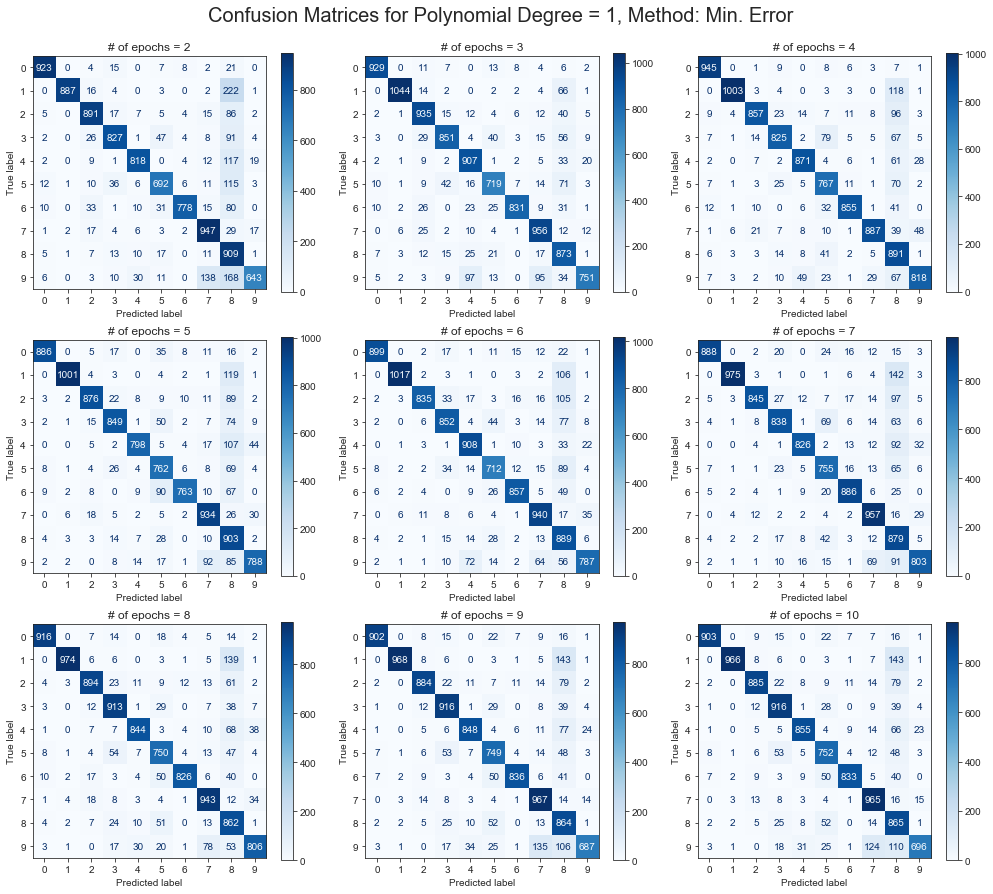

In [137]:
classifiers=d1_cm_list
degrees=['# of epochs = 2','# of epochs = 3','# of epochs = 4','# of epochs = 5','# of epochs = 6','# of epochs = 7','# of epochs = 8','# of epochs = 9','# of epochs = 10']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,12))
fig.suptitle('Confusion Matrices for Polynomial Degree = 1, Method: Min. Error', y= 1.03, fontsize=20)
a=0
for cls, ax in zip(classifiers, axes.flatten()):
    disp = ConfusionMatrixDisplay(cls,display_labels=[0,1,2,3,4,5,6,7,8,9])
    disp.plot(ax=ax, cmap='Blues')
    disp.ax_.set_title(degrees[a])
    a=a+1
plt.tight_layout()  
plt.show()

In [139]:
d2_p_list=[predict(K_test_d2,ens_K2[i]) for i in range (0,9)]

In [140]:
d2_cm_list=[(confusion_matrix(mnist_test_y, d2_p_list[k])) for k in range (0,9)]

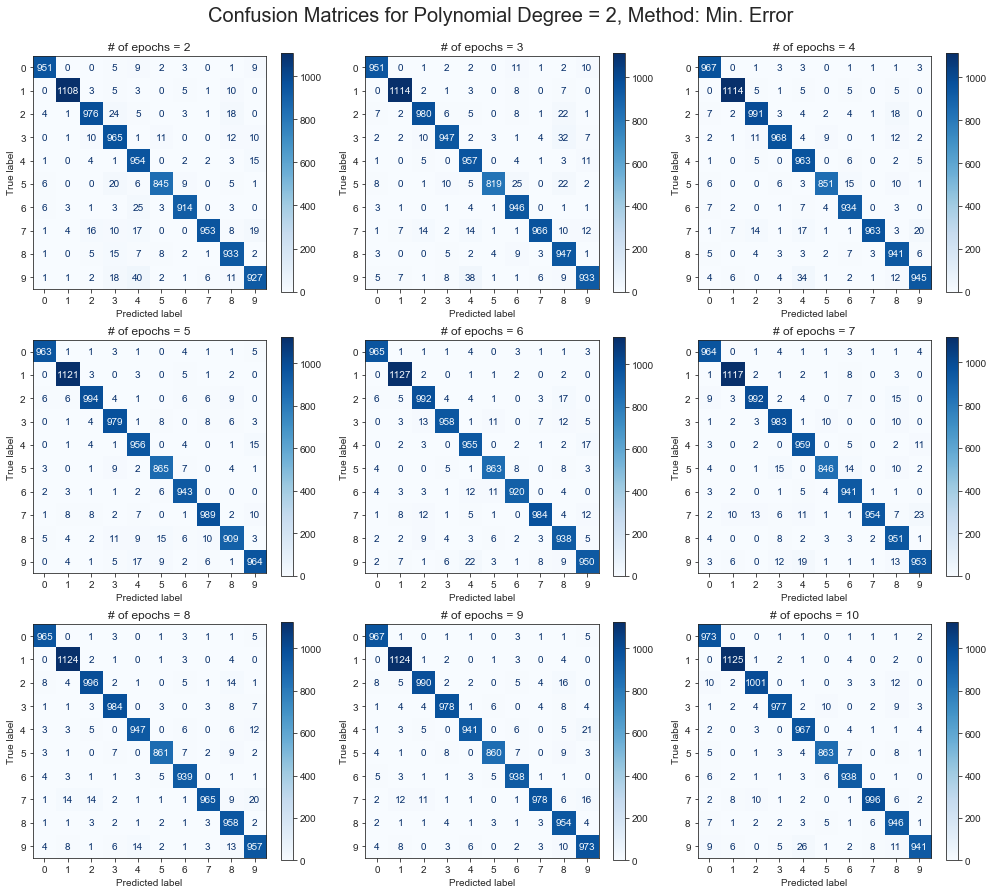

In [141]:
classifiers=d2_cm_list
degrees=['# of epochs = 2','# of epochs = 3','# of epochs = 4','# of epochs = 5','# of epochs = 6','# of epochs = 7','# of epochs = 8','# of epochs = 9','# of epochs = 10']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,12))
fig.suptitle('Confusion Matrices for Polynomial Degree = 2, Method: Min. Error', y= 1.03, fontsize=20)
a=0
for cls, ax in zip(classifiers, axes.flatten()):
    disp = ConfusionMatrixDisplay(cls,display_labels=[0,1,2,3,4,5,6,7,8,9])
    disp.plot(ax=ax, cmap='Blues')
    disp.ax_.set_title(degrees[a])
    a=a+1
plt.tight_layout()  
plt.show()

In [142]:
d3_p_list=[predict(K_test_d3,ens_K3[i]) for i in range (0,9)]

In [143]:
d3_cm_list=[(confusion_matrix(mnist_test_y, d3_p_list[k])) for k in range (0,9)]

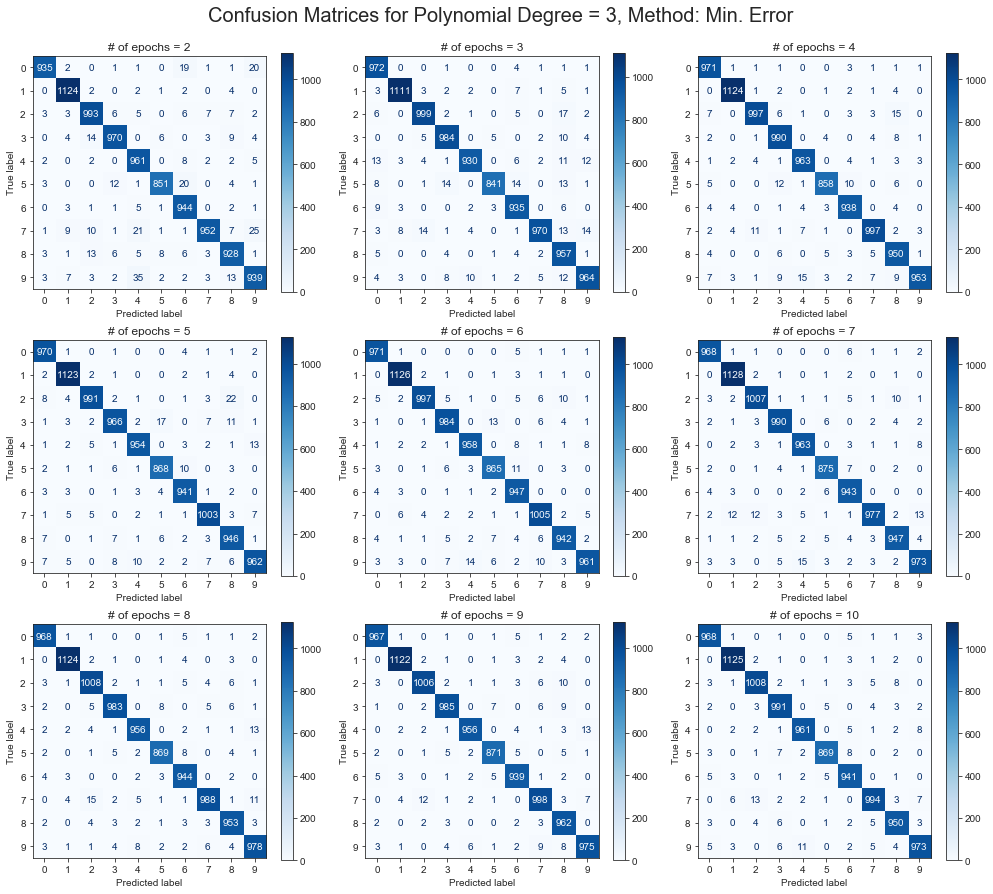

In [144]:
classifiers=d3_cm_list
degrees=['# of epochs = 2','# of epochs = 3','# of epochs = 4','# of epochs = 5','# of epochs = 6','# of epochs = 7','# of epochs = 8','# of epochs = 9','# of epochs = 10']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,12))
fig.suptitle('Confusion Matrices for Polynomial Degree = 3, Method: Min. Error', y= 1.03, fontsize=20)
a=0
for cls, ax in zip(classifiers, axes.flatten()):
    disp = ConfusionMatrixDisplay(cls,display_labels=[0,1,2,3,4,5,6,7,8,9])
    disp.plot(ax=ax, cmap='Blues')
    disp.ax_.set_title(degrees[a])
    a=a+1
plt.tight_layout()  
plt.show()

In [145]:
d4_p_list=[predict(K_test_d4,ens_K4[i]) for i in range (0,9)]

In [146]:
d4_cm_list=[(confusion_matrix(mnist_test_y, d4_p_list[k])) for k in range (0,9)]

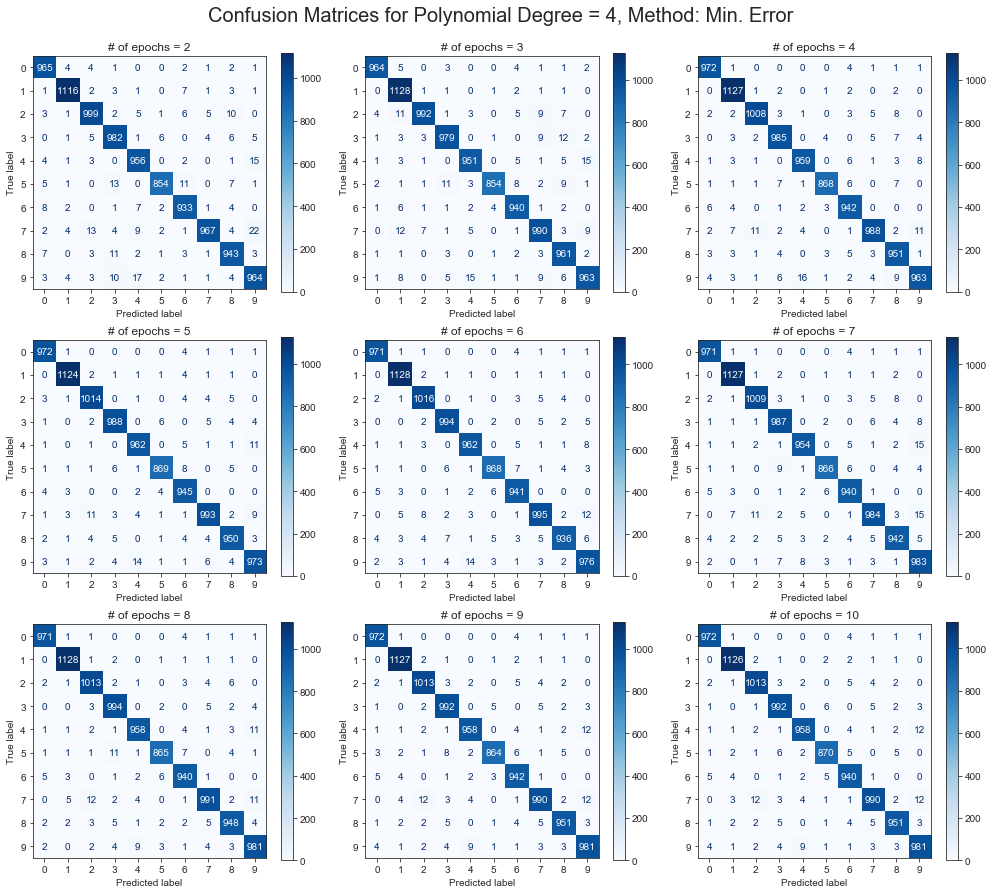

In [147]:
classifiers=d4_cm_list
degrees=['# of epochs = 2','# of epochs = 3','# of epochs = 4','# of epochs = 5','# of epochs = 6','# of epochs = 7','# of epochs = 8','# of epochs = 9','# of epochs = 10']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,12))
fig.suptitle('Confusion Matrices for Polynomial Degree = 4, Method: Min. Error', y= 1.03, fontsize=20)
a=0
for cls, ax in zip(classifiers, axes.flatten()):
    disp = ConfusionMatrixDisplay(cls,display_labels=[0,1,2,3,4,5,6,7,8,9])
    disp.plot(ax=ax, cmap='Blues')
    disp.ax_.set_title(degrees[a])
    a=a+1
plt.tight_layout()  
plt.show()

In [148]:
d5_p_list=[predict(K_test_d5,ens_K5[i]) for i in range (0,9)]

In [149]:
d5_cm_list=[(confusion_matrix(mnist_test_y, d5_p_list[k])) for k in range (0,9)]

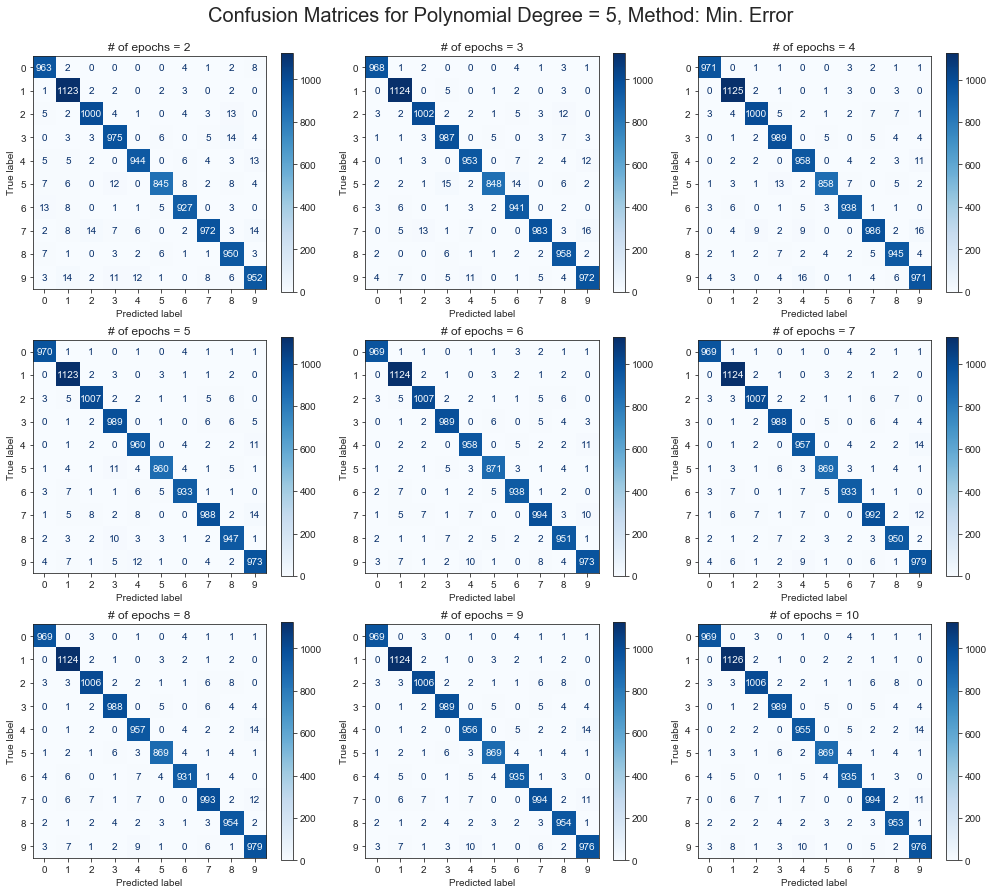

In [150]:
classifiers=d5_cm_list
degrees=['# of epochs = 2','# of epochs = 3','# of epochs = 4','# of epochs = 5','# of epochs = 6','# of epochs = 7','# of epochs = 8','# of epochs = 9','# of epochs = 10']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,12))
fig.suptitle('Confusion Matrices for Polynomial Degree = 5, Method: Min. Error', y= 1.03, fontsize=20)
a=0
for cls, ax in zip(classifiers, axes.flatten()):
    disp = ConfusionMatrixDisplay(cls,display_labels=[0,1,2,3,4,5,6,7,8,9])
    disp.plot(ax=ax, cmap='Blues')
    disp.ax_.set_title(degrees[a])
    a=a+1
plt.tight_layout()  
plt.show()

In [151]:
d6_p_list=[predict(K_test_d6,ens_K6[i]) for i in range (0,9)]

In [152]:
d6_cm_list=[(confusion_matrix(mnist_test_y, d6_p_list[k])) for k in range (0,9)]

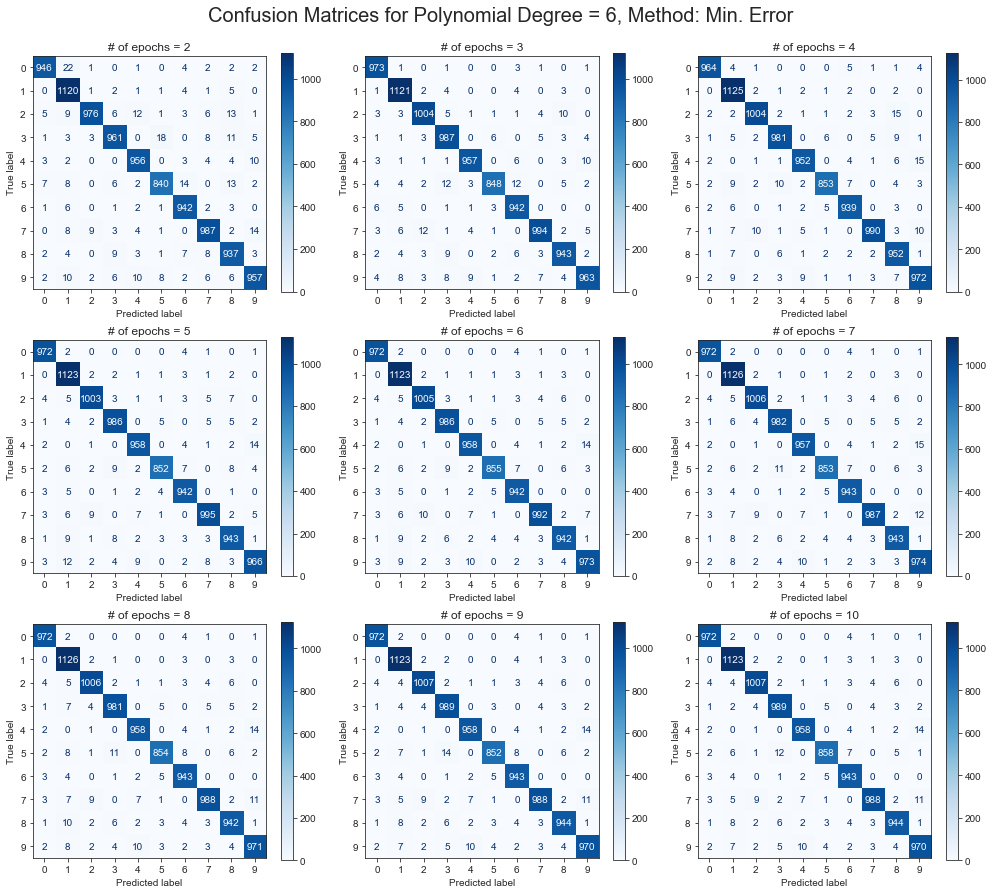

In [153]:
classifiers=d6_cm_list
degrees=['# of epochs = 2','# of epochs = 3','# of epochs = 4','# of epochs = 5','# of epochs = 6','# of epochs = 7','# of epochs = 8','# of epochs = 9','# of epochs = 10']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,12))
fig.suptitle('Confusion Matrices for Polynomial Degree = 6, Method: Min. Error', y= 1.03, fontsize=20)
a=0
for cls, ax in zip(classifiers, axes.flatten()):
    disp = ConfusionMatrixDisplay(cls,display_labels=[0,1,2,3,4,5,6,7,8,9])
    disp.plot(ax=ax, cmap='Blues')
    disp.ax_.set_title(degrees[a])
    a=a+1
plt.tight_layout()  
plt.show()

#### Creation of the groups of confusion matrices for the different degrees of the polynomial and the different number of epochs in order to examine the errors incurred, when the average of the predictors in the ensemble is used.

In [154]:
d1_avr_p_list=[predict(K_test_d1,ens_avr_K1[i]) for i in range (0,9)]
d1_avr_cm_list=[(confusion_matrix(mnist_test_y, d1_avr_p_list[k])) for k in range (0,9)]

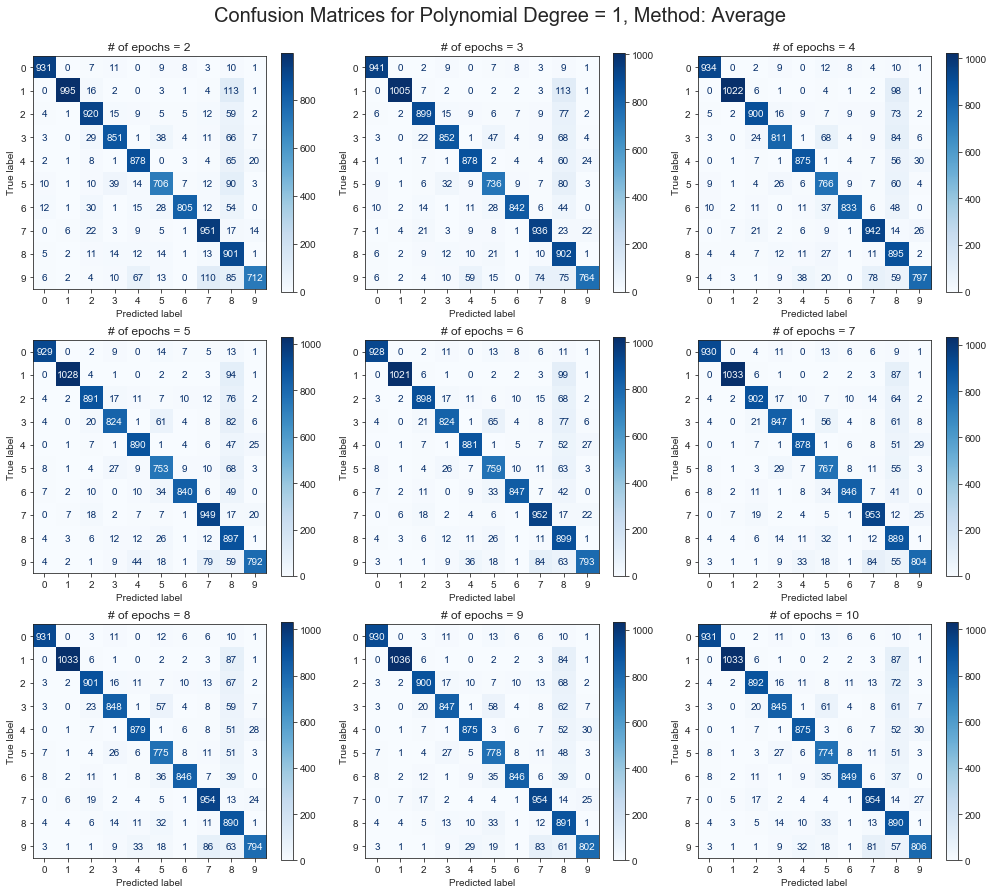

In [155]:
classifiers=d1_avr_cm_list
degrees=['# of epochs = 2','# of epochs = 3','# of epochs = 4','# of epochs = 5','# of epochs = 6','# of epochs = 7','# of epochs = 8','# of epochs = 9','# of epochs = 10']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,12))
fig.suptitle('Confusion Matrices for Polynomial Degree = 1, Method: Average', y= 1.03, fontsize=20)
a=0
for cls, ax in zip(classifiers, axes.flatten()):
    disp = ConfusionMatrixDisplay(cls,display_labels=[0,1,2,3,4,5,6,7,8,9])
    disp.plot(ax=ax, cmap='Blues')
    disp.ax_.set_title(degrees[a])
    a=a+1
plt.tight_layout()  
plt.show()

In [156]:
d2_avr_p_list=[predict(K_test_d2,ens_avr_K2[i]) for i in range (0,9)]
d2_avr_cm_list=[(confusion_matrix(mnist_test_y, d2_avr_p_list[k])) for k in range (0,9)]

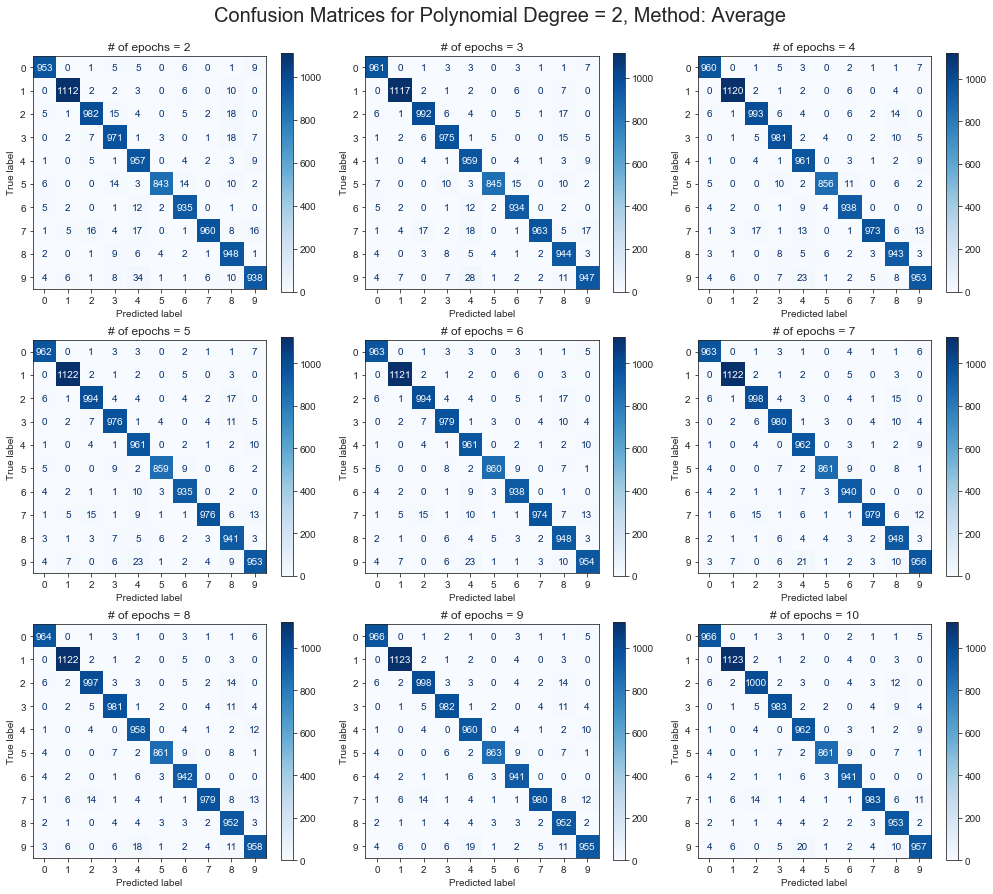

In [157]:
classifiers=d2_avr_cm_list
degrees=['# of epochs = 2','# of epochs = 3','# of epochs = 4','# of epochs = 5','# of epochs = 6','# of epochs = 7','# of epochs = 8','# of epochs = 9','# of epochs = 10']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,12))
fig.suptitle('Confusion Matrices for Polynomial Degree = 2, Method: Average', y= 1.03, fontsize=20)
a=0
for cls, ax in zip(classifiers, axes.flatten()):
    disp = ConfusionMatrixDisplay(cls,display_labels=[0,1,2,3,4,5,6,7,8,9])
    disp.plot(ax=ax, cmap='Blues')
    disp.ax_.set_title(degrees[a])
    a=a+1
plt.tight_layout()  
plt.show()

In [158]:
d3_avr_p_list=[predict(K_test_d3,ens_avr_K3[i]) for i in range (0,9)]
d3_avr_cm_list=[(confusion_matrix(mnist_test_y, d3_avr_p_list[k])) for k in range (0,9)]

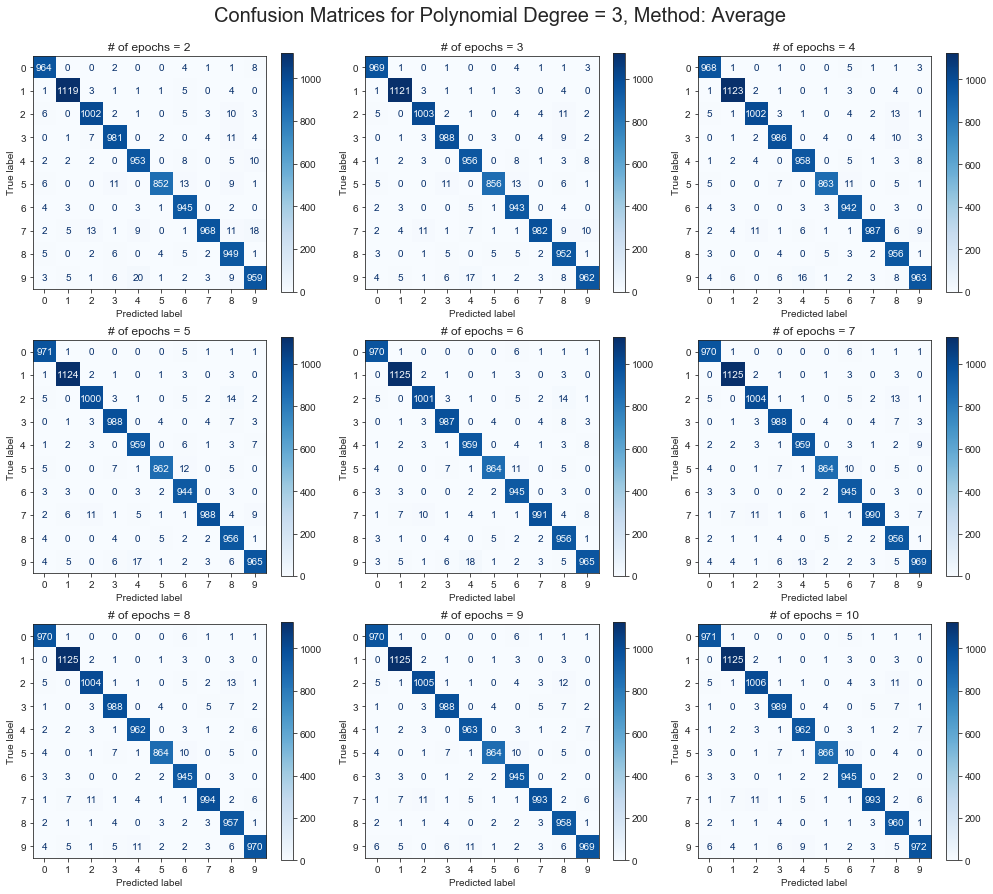

In [159]:
classifiers=d3_avr_cm_list
degrees=['# of epochs = 2','# of epochs = 3','# of epochs = 4','# of epochs = 5','# of epochs = 6','# of epochs = 7','# of epochs = 8','# of epochs = 9','# of epochs = 10']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,12))
fig.suptitle('Confusion Matrices for Polynomial Degree = 3, Method: Average', y= 1.03, fontsize=20)
a=0
for cls, ax in zip(classifiers, axes.flatten()):
    disp = ConfusionMatrixDisplay(cls,display_labels=[0,1,2,3,4,5,6,7,8,9])
    disp.plot(ax=ax, cmap='Blues')
    disp.ax_.set_title(degrees[a])
    a=a+1
plt.tight_layout()  
plt.show()

In [160]:
d4_avr_p_list=[predict(K_test_d4,ens_avr_K4[i]) for i in range (0,9)]
d4_avr_cm_list=[(confusion_matrix(mnist_test_y, d4_avr_p_list[k])) for k in range (0,9)]

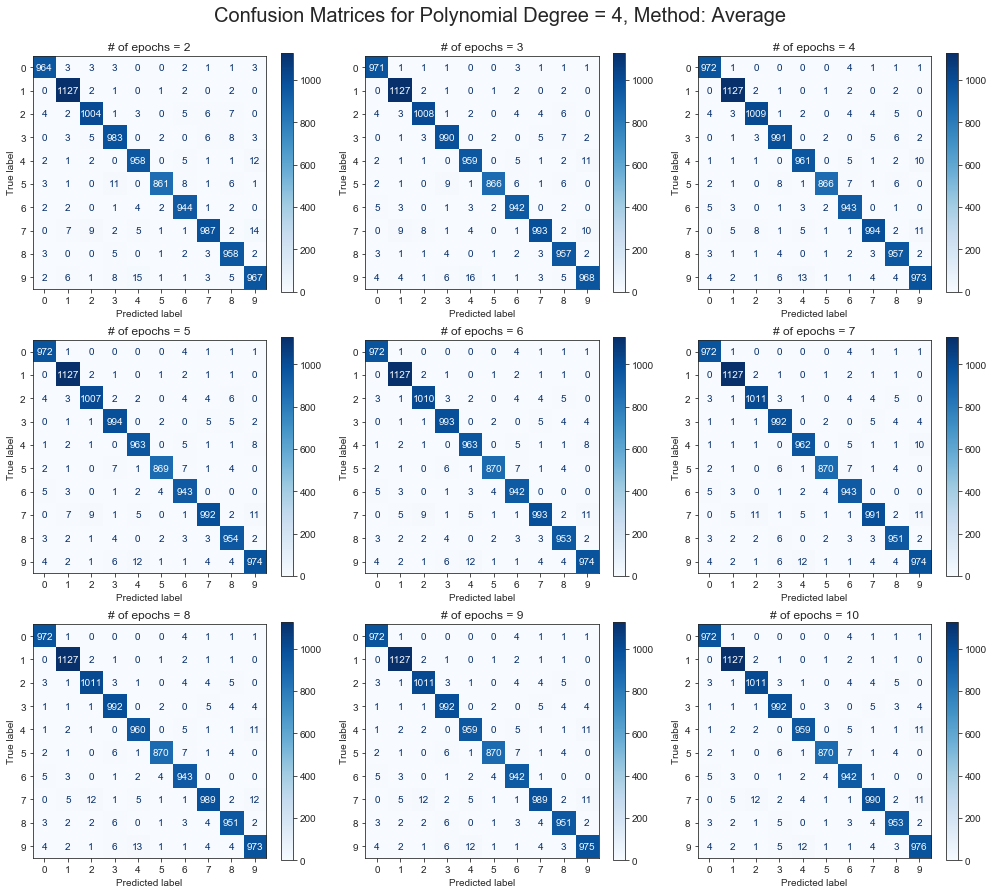

In [161]:
classifiers=d4_avr_cm_list
degrees=['# of epochs = 2','# of epochs = 3','# of epochs = 4','# of epochs = 5','# of epochs = 6','# of epochs = 7','# of epochs = 8','# of epochs = 9','# of epochs = 10']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,12))
fig.suptitle('Confusion Matrices for Polynomial Degree = 4, Method: Average', y= 1.03, fontsize=20)
a=0
for cls, ax in zip(classifiers, axes.flatten()):
    disp = ConfusionMatrixDisplay(cls,display_labels=[0,1,2,3,4,5,6,7,8,9])
    disp.plot(ax=ax, cmap='Blues')
    disp.ax_.set_title(degrees[a])
    a=a+1
plt.tight_layout()  
plt.show()

In [162]:
d5_avr_p_list=[predict(K_test_d5,ens_avr_K5[i]) for i in range (0,9)]
d5_avr_cm_list=[(confusion_matrix(mnist_test_y, d5_avr_p_list[k])) for k in range (0,9)]

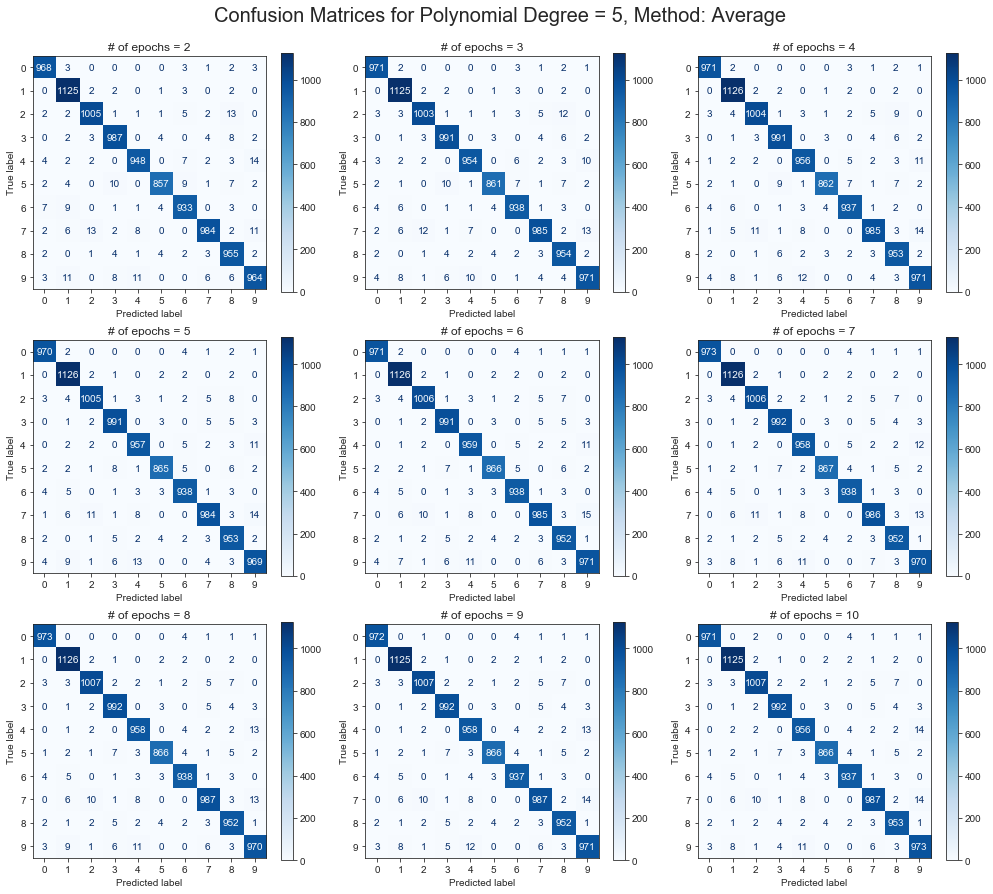

In [163]:
classifiers=d5_avr_cm_list
degrees=['# of epochs = 2','# of epochs = 3','# of epochs = 4','# of epochs = 5','# of epochs = 6','# of epochs = 7','# of epochs = 8','# of epochs = 9','# of epochs = 10']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,12))
fig.suptitle('Confusion Matrices for Polynomial Degree = 5, Method: Average', y= 1.03, fontsize=20)
a=0
for cls, ax in zip(classifiers, axes.flatten()):
    disp = ConfusionMatrixDisplay(cls,display_labels=[0,1,2,3,4,5,6,7,8,9])
    disp.plot(ax=ax, cmap='Blues')
    disp.ax_.set_title(degrees[a])
    a=a+1
plt.tight_layout()  
plt.show()

In [164]:
d6_avr_p_list=[predict(K_test_d6,ens_avr_K6[i]) for i in range (0,9)]
d6_avr_cm_list=[(confusion_matrix(mnist_test_y, d6_avr_p_list[k])) for k in range (0,9)]

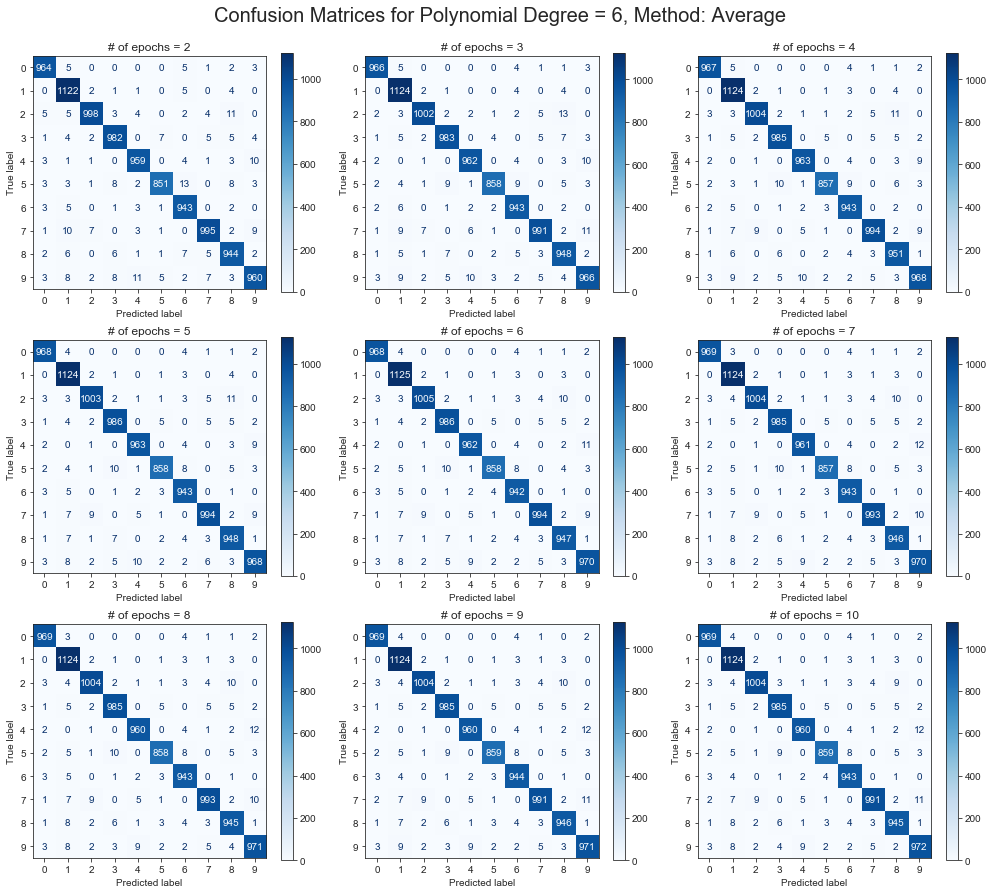

In [165]:
classifiers=d6_avr_cm_list
degrees=['# of epochs = 2','# of epochs = 3','# of epochs = 4','# of epochs = 5','# of epochs = 6','# of epochs = 7','# of epochs = 8','# of epochs = 9','# of epochs = 10']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,12))
fig.suptitle('Confusion Matrices for Polynomial Degree = 6, Method: Average', y= 1.03, fontsize=20)
a=0
for cls, ax in zip(classifiers, axes.flatten()):
    disp = ConfusionMatrixDisplay(cls,display_labels=[0,1,2,3,4,5,6,7,8,9])
    disp.plot(ax=ax, cmap='Blues')
    disp.ax_.set_title(degrees[a])
    a=a+1
plt.tight_layout()  
plt.show()

#### Visualization of a misclassified example using 4th degree polynomial kernel

In [269]:
df=pd.DataFrame(d4_avr_p_list[0]).join(mnist_test_y)
df_e=np.where(df.iloc[:,0].astype(int)!=df.iloc[:,1])

In [270]:
df_e

(array([   0,   28,   90,   94,  141,  174,  301,  314,  332,  350,  381,
         386,  421,  509,  511,  521,  559,  645,  654,  668,  723,  725,
         760,  773,  814,  841,  862,  889, 1002, 1022, 1055, 1096, 1112,
        1132, 1154, 1166, 1220, 1227, 1231, 1305, 1337, 1342, 1539, 1555,
        1556, 1560, 1575, 1588, 1591, 1701, 1735, 1761, 1829, 1961, 1990,
        2015, 2214, 2243, 2263, 2298, 2321, 2369, 2387, 2400, 2526, 2548,
        2781, 2807, 2829, 2845, 2896, 2964, 2985, 3050, 3056, 3057, 3148,
        3156, 3189, 3223, 3269, 3279, 3297, 3301, 3355, 3361, 3383, 3397,
        3427, 3428, 3542, 3554, 3672, 3675, 3747, 3776, 3944, 3946, 3954,
        3965, 4159, 4191, 4304, 4316, 4405, 4409, 4458, 4463, 4481, 4723,
        4756, 4766, 4775, 4783, 4808, 4820, 4877, 4909, 5045, 5110, 5121,
        5129, 5164, 5219, 5263, 5265, 5284, 5302, 5351, 5357, 5358, 5436,
        5446, 5455, 5537, 5625, 5642, 5755, 5770, 5781, 5881, 6025, 6081,
        6105, 6108, 6127, 6143, 6208, 

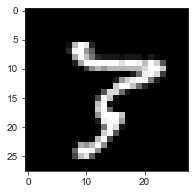

This digit was misclassified as 7 but its true label is 3 .


In [275]:
plt.figure(figsize=(3,3))
idx = 8834
grid_data=mnist_test_X.iloc[idx].values.reshape(28,28)
plt.imshow(grid_data,interpolation='none', cmap='gray')
plt.show()
print ('This digit was misclassified as', (df.iloc[:,0][idx]).astype(int), 'but its true label is', df.iloc[:,1][idx],'.')